# Basic isoprenol analysis

Make some basic plots for isoprenol comparison across DBTL cycles.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
isoprenol_files = [f'dbtl{i}_isoprenol.pkl' for i in [0, 1, 2, 3, 4]]
df_list = [pd.read_pickle(f) for f in isoprenol_files]
for i, df in enumerate(df_list):
    df['cycle'] = i

df_all = pd.concat(df_list).reset_index(drop = True)
df_all.head(3)
df_all['is_control'] = df_all['Line Name'].apply(lambda x: 'ontrol' in x)


In [3]:
df_all.columns

Index(['Study ID', 'Study Name', 'Line ID', 'Replicate Key', 'Line Name',
       'Line Description', 'Protocol', 'Assay ID', 'Assay Name', 'Formal Type',
       'Measurement Type', 'Compartment', 'Units', 'Value', 'Hours', 'cycle',
       'is_control'],
      dtype='object')

/tmp/ipykernel_738/4290417705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,3]) & (~df_all['is_control'])),:],
/tmp/ipykernel_738/4290417705.py:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,3]) & (~df_all['is_control'])),:],


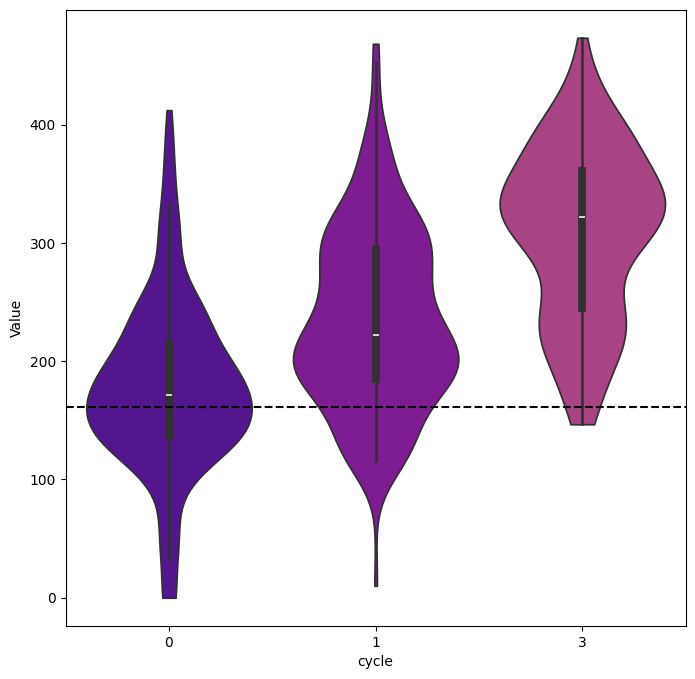

In [4]:
fig, ax = plt.subplots(figsize = (8,8))
sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,3]) & (~df_all['is_control'])),:],
               x = 'cycle',
               y = 'Value',
               cut = 0,
               palette= sns.color_palette('plasma'),
              ax = ax)

control_mean_all = df_all.loc[df_all['is_control'], 'Value'].values.mean()
ax.axhline(control_mean_all, c='k', linestyle = '--')
fig.savefig('dbtl0_1_3_violin_compare.pdf')

/tmp/ipykernel_738/85419037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,2,3,4]) & (~df_all['is_control'])),:],
/tmp/ipykernel_738/85419037.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,2,3,4]) & (~df_all['is_control'])),:],


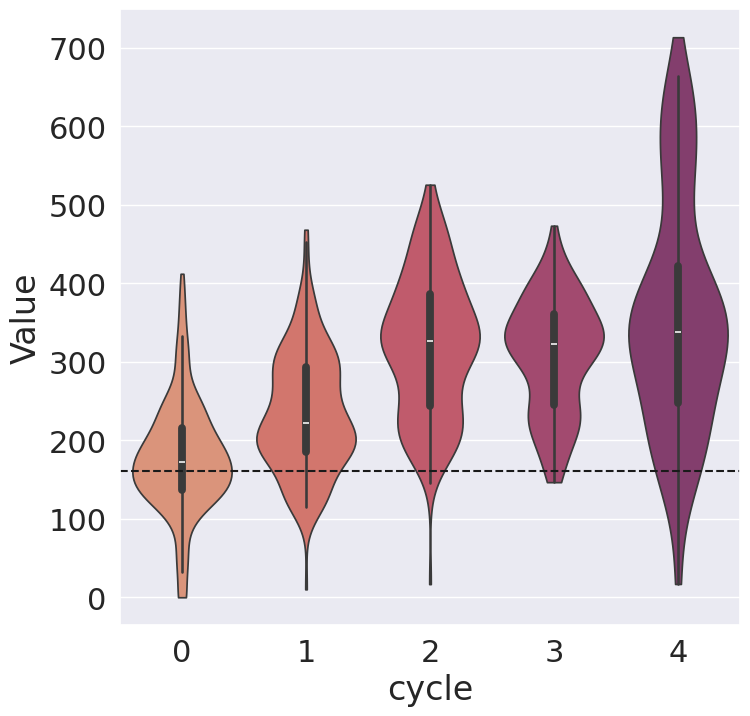

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,2,3,4]) & (~df_all['is_control'])),:],
               x = 'cycle',
               y = 'Value',
               cut = 0,
               palette= sns.color_palette('flare'),
               ax = ax
              )

control_mean_all = df_all.loc[df_all['is_control'], 'Value'].values.mean()
ax.axhline(control_mean_all, c='k', linestyle = '--')
fig.savefig('dbtl0_1_2_3_4_violin_compare.pdf')
fig.savefig('dbtl0_1_2_3_4_violin_compare.png')

/tmp/ipykernel_738/2475907870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,2,3,4]) & (df_all['is_control'])),:],
/tmp/ipykernel_738/2475907870.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,2,3,4]) & (df_all['is_control'])),:],


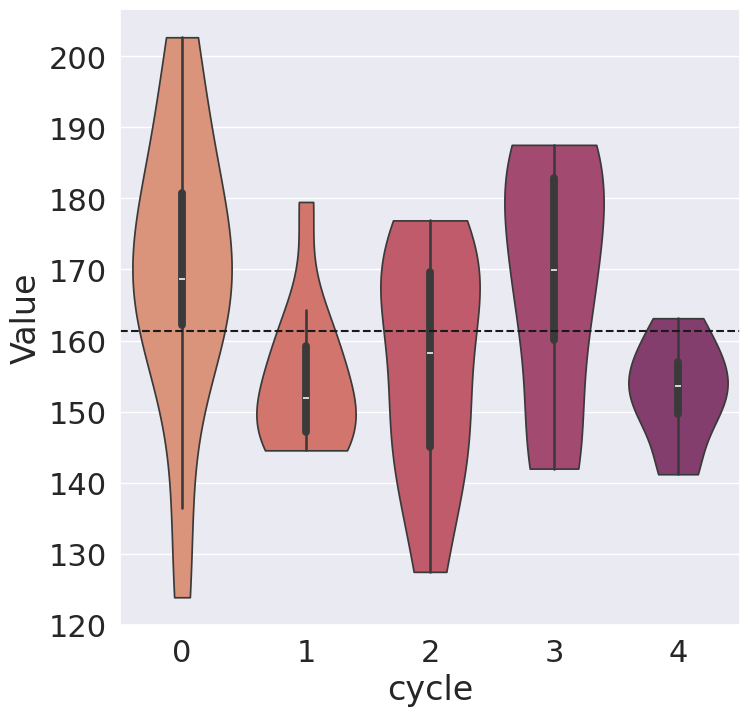

In [13]:
fig, ax = plt.subplots(figsize = (8,8))
sns.violinplot(data = df_all.loc[(df_all['cycle'].isin([0,1,2,3,4]) & (df_all['is_control'])),:],
               x = 'cycle',
               y = 'Value',
               cut = 0,
               palette= sns.color_palette('flare'),
               ax = ax
              )

control_mean_all = df_all.loc[df_all['is_control'], 'Value'].values.mean()
ax.axhline(control_mean_all, c='k', linestyle = '--')
fig.savefig('dbtl0_1_2_3_4_CONTROL_violin_compare.pdf')
fig.savefig('dbtl0_1_2_3_4_CONTROL_violin_compare.png')

## Make overall figure

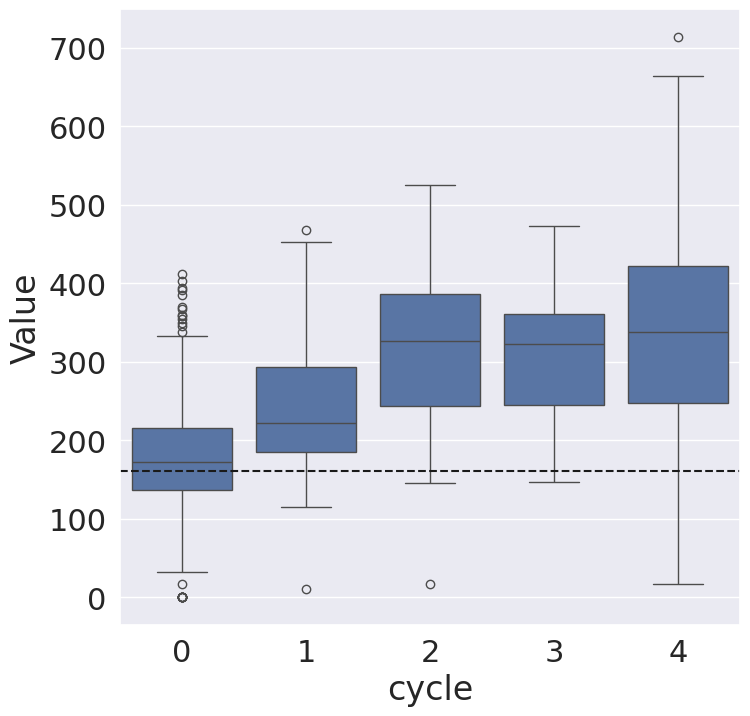

In [14]:
fig, ax = plt.subplots(figsize = (8,8))
sns.boxplot(data = df_all.loc[(~df_all['is_control']),:],
               x = 'cycle',
               y = 'Value',
               ax = ax)

# max_titer_vals = [df_all.loc[df_all['cycle'] == i, 'Value'].max() for i in [0,1,2,3]]
# max_titer_df = df_all.loc[
#     df_all['Value'].isin(max_titer_vals),
#     :
# ]
# sns.lineplot(data = max_titer_df,
#                x = 'cycle',
#                y = 'Value',
#                ax = ax)
control_mean_all = df_all.loc[df_all['is_control'], 'Value'].values.mean()
ax.axhline(control_mean_all, c='k', linestyle = '--')
fig.savefig('all_isoprenol_comparison.png')

## Make hypothetical figure w/ fake data

/tmp/ipykernel_738/3711295708.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_fake.loc[(~df_fake['is_control']),:],


Text(0.5, 0, 'DBTL Cycle')

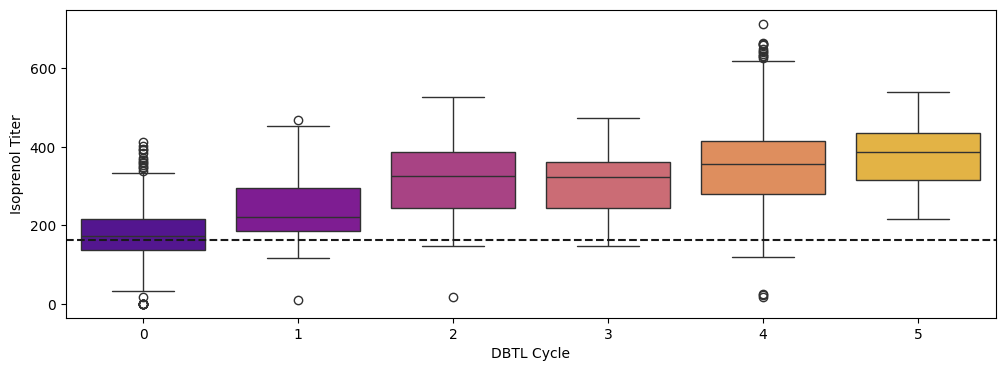

In [7]:
df_fake = df_all.copy()
df_fake_newcycle = df_fake[df_fake['cycle'] == 3]
df_fake_newcycle.loc[:,'cycle'] = 4
df_fake_newcycle.loc[:,'Value'] += 50 + np.random.normal(loc = 0, scale = 10, size = len(df_fake_newcycle))
df_fake=pd.concat([df_fake, df_fake_newcycle])
df_fake_newcycle.loc[:,'cycle'] = 5
df_fake_newcycle.loc[:,'Value'] += 20 + np.random.normal(loc = 0, scale = 10, size = len(df_fake_newcycle))
df_fake=pd.concat([df_fake, df_fake_newcycle])

fig, ax = plt.subplots(figsize = (12,4))
sns.set(font_scale = 2)
sns.boxplot(data = df_fake.loc[(~df_fake['is_control']),:],
               x = 'cycle',
               y = 'Value',
               ax = ax,
           palette= sns.color_palette('plasma')
           )
control_mean_all = df_all.loc[df_all['is_control'], 'Value'].values.mean()
ax.axhline(control_mean_all, c='k', linestyle = '--')
ax.set_ylabel('Isoprenol Titer')
ax.set_xlabel('DBTL Cycle')

/tmp/ipykernel_738/2193019192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_fake.loc[(~df_fake['is_control']),:],


Text(0, 0.5, 'DBTL Cycle')

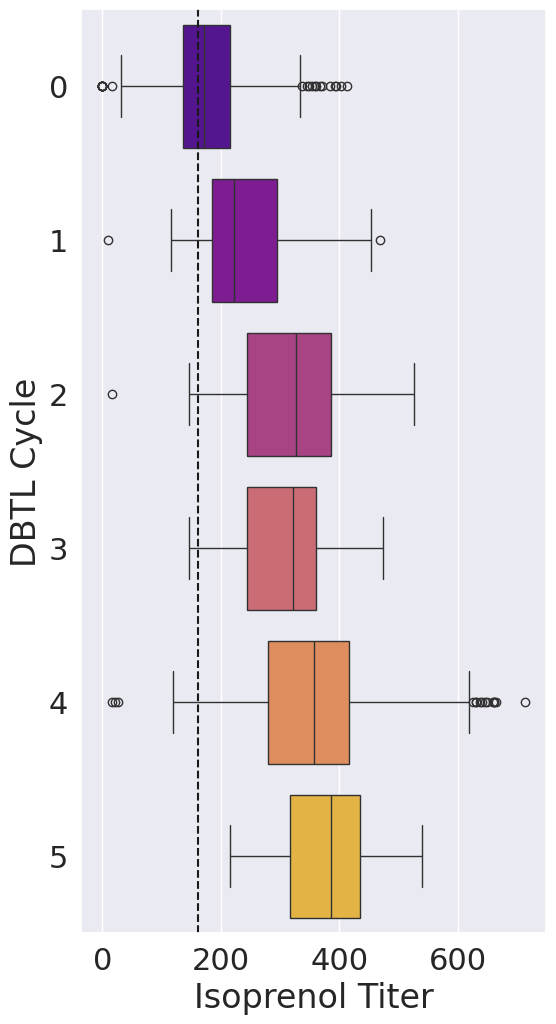

In [8]:
fig, ax = plt.subplots(figsize = (6,12))
# sns.set(font_scale = 2)
sns.boxplot(data = df_fake.loc[(~df_fake['is_control']),:],
               y = 'cycle',
               x = 'Value',
               ax = ax,
           palette= sns.color_palette('plasma'),
            orient = 'h'
           )
control_mean_all = df_all.loc[df_all['is_control'], 'Value'].values.mean()
ax.axvline(control_mean_all, c='k', linestyle = '--')
ax.set_xlabel('Isoprenol Titer')
ax.set_ylabel('DBTL Cycle')